# Sensitivity, Specificity, and ROC curve
---


In [3]:
# Set up
# import packages
import numpy as np
from numpy.random import *
import pandas as pd
import statsmodels as sm
from matplotlib import pyplot as plt


In [4]:
def ROC(x, ValList, ans, xbin, xrange = [], figsize = [5, 5], dpi = 300,
        lcolor = 'salmon', marker = 'o', msize = 5,
        refcolor = 'gray', refline = '--'):
    if len(xrange) == 0:
        xrange = [min(x), max(x)]
    
    _step = (xrange[1] - xrange[0]) / xbin
    
    _bin = []
    _sense = []
    _fposi = []
    for i in range(xbin):
        _cutoff = xrange[0] + i * _step
        _bin.append(_cutoff)
        pred = x.apply(lambda val: ValList[0] if val >= _cutoff else ValList[1])
        
        _tab = pd.crosstab(index = ans,
                           columns = pred,
                           margins = False)
        
        if len(pred.loc[pred == ValList[0]]) == 0:
            _tab[ValList[0]] = 0
        elif len(pred.loc[pred == ValList[1]]) == 0:
            _tab[ValList[1]] = 0
        
        sensitivity = _tab.loc[ValList[0], ValList[0]] / sum(_tab.loc[ValList[0]])
        specificity = _tab.loc[ValList[1], ValList[1]] / sum(_tab.loc[ValList[1]])
        F_Positive  = 1 - specificity
        _sense.append(sensitivity)
        _fposi.append(F_Positive)
        
    _result = pd.DataFrame({'sensitivity': _sense,
                            'f_positive': _fposi})
    
    xref = np.arange(0, 1, 0.01)
    yref = np.arange(0, 1, 0.01)
    
    plt.figure(figsize = figsize, dpi = dpi)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel("False Positive")
    plt.ylabel("Sensitivity")
    plt.plot(_result['f_positive'],
             _result['sensitivity'],
             linestyle = "-",
             color = lcolor,
             marker = marker,
             markersize = msize,
             drawstyle = 'steps-pre'
             )
    plt.plot(xref,
             yref,
             linestyle = "--",
             color = refcolor,
             )
    plt.show()
    return _result


In [5]:
# sample data generation
seed(123)
sample = pd.DataFrame({'sample_y': 30 + np.random.randn(200) * 10})
sample = sample.assign(
            sample_T = sample.sample_y.apply(lambda x: "TRUE" if x > 40 else "FALSE"),
            sample_x = sample.sample_y / 10 + np.random.randn(200) * 2
            )

### Draw ROC curve
ROC(x, ValList, ans, xbin, xrange = [], figsize = [5, 5], dpi = 300,
    lcolor = 'salmon', marker = 'o', msize = 5,
    refcolor = 'gray', refline = '--')

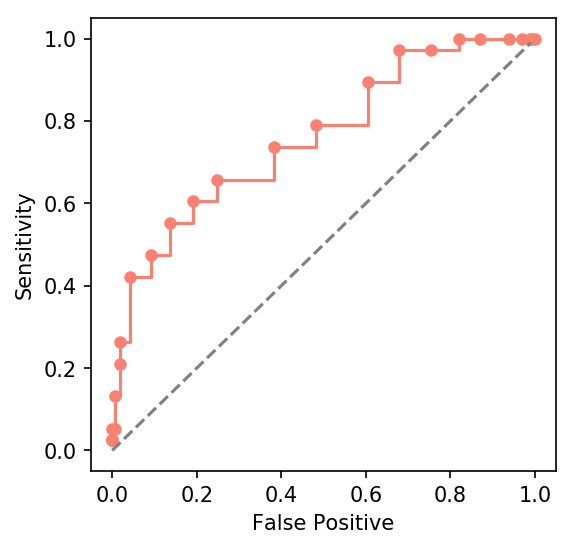

In [6]:
%matplotlib inline
res = ROC(x = sample.sample_x, 
          ValList = ['TRUE', 'FALSE'], 
          ans = sample.sample_T, 
          xbin = 25,
          figsize = [4,4],
          dpi = 150)